In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rupindersinghrana/credit-card-customer-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rupindersinghrana/credit-card-customer-segmentation/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/rupindersinghrana/credit-card-customer-segmentation/versions/1/credit_card_customer_data.csv")

In [ ]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [ ]:
print(df.columns)


Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [ ]:
df.shape

(660, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
#check null
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
df_duplicated = df[["Sl_No","Customer Key","Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank","Total_visits_online",'Total_calls_made']]

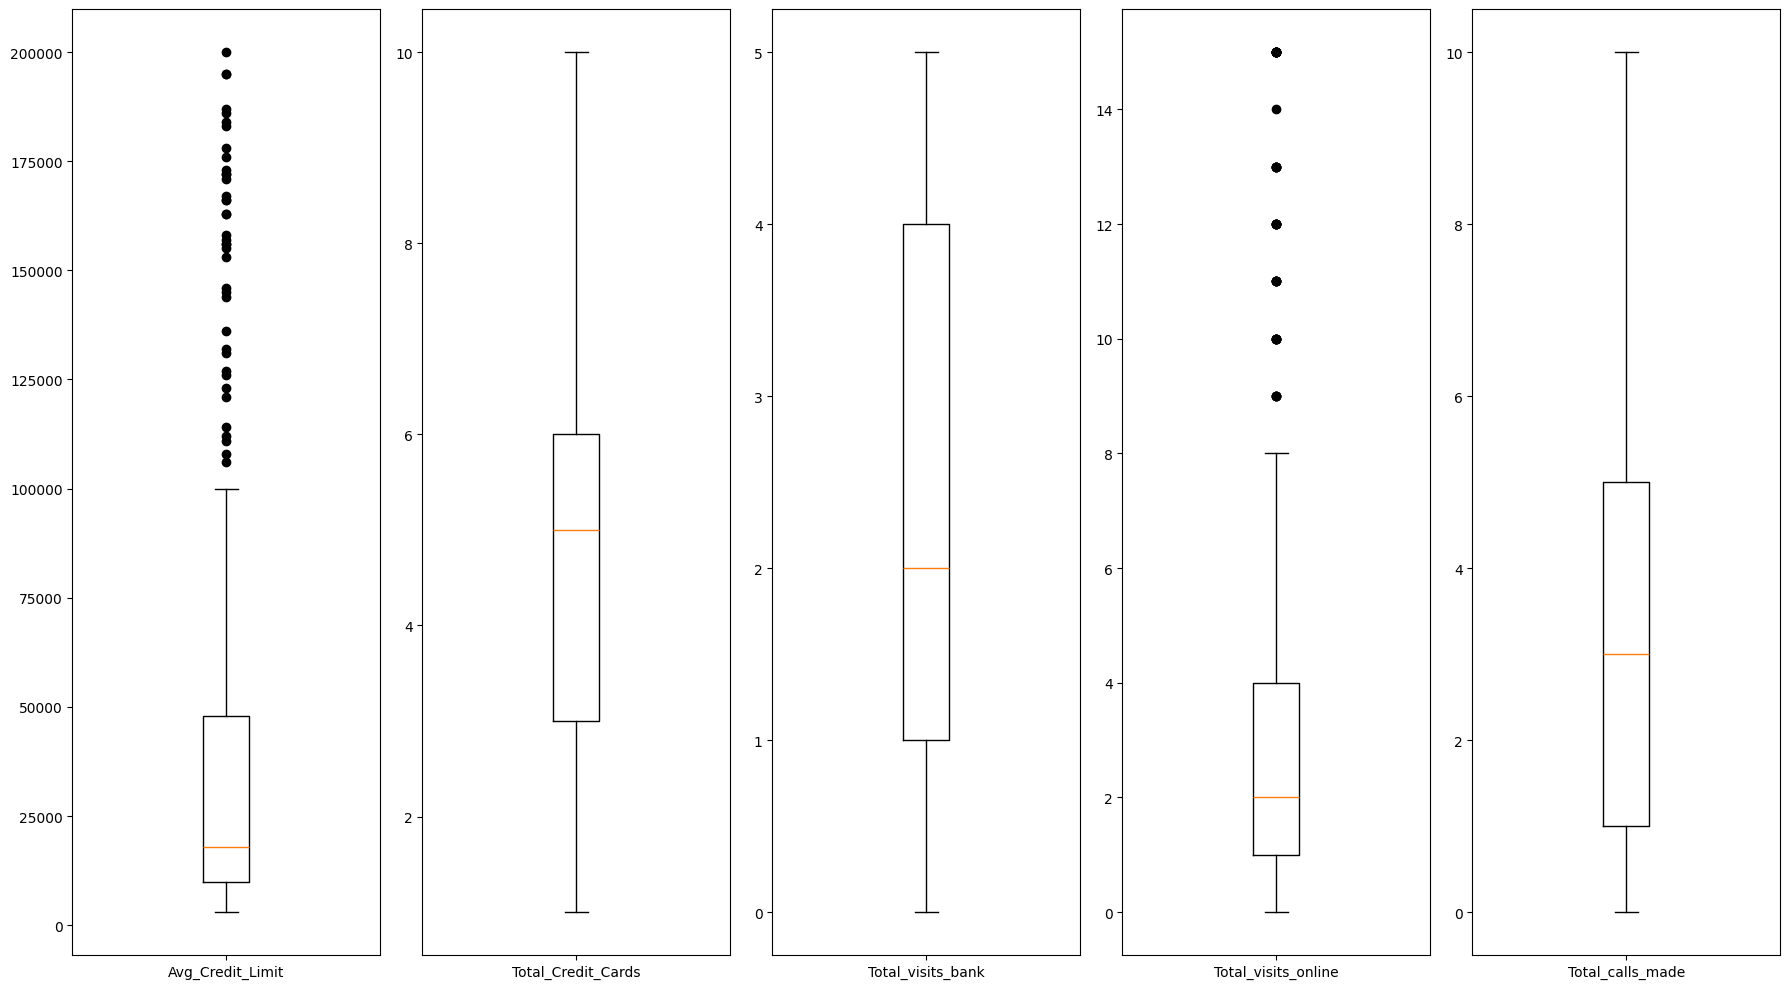

In [ ]:
#check outlier
numeric_cols = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank","Total_visits_online",'Total_calls_made']
fig, axes = plt.subplots(figsize=(18, 10), nrows=1, ncols=5, squeeze=0)
i = 0
for ax, col in zip(axes.reshape(-1), numeric_cols):
 ax.boxplot(df_duplicated[col], tick_labels=[col], sym='k')
plt.tight_layout()

In [ ]:
#calculate Percentile at 25 and 75
Q1_Avg_Credit_limit = df_duplicated["Avg_Credit_Limit"].quantile(0.25)
Q3_Avg_Credit_limit = df_duplicated["Avg_Credit_Limit"].quantile(0.75)
IQR_Avg_Credit_Limit = Q3_Avg_Credit_limit - Q1_Avg_Credit_limit
print(f" IQR_Avg_Credit_Limit = {IQR_Avg_Credit_Limit}")


Q1_Total_Visits_online = df_duplicated["Total_visits_online"].quantile(0.25)
Q3_Total_Visits_online = df_duplicated["Total_visits_online"].quantile(0.75)
IQR_Total_Visits_online = Q3_Total_Visits_online - Q1_Total_Visits_online
print(f" IQR_Total_visits_online = {IQR_Total_Visits_online}")


 IQR_Avg_Credit_Limit = 38000.0
 IQR_Total_visits_online = 3.0


In [ ]:
lower_bound_Avg_Credit_limit = Q1_Avg_Credit_limit - 1.5 * IQR_Avg_Credit_Limit
upper_bound_Avg_Credit_limit = Q3_Avg_Credit_limit + 1.5 * IQR_Avg_Credit_Limit
print(f"lower_bound_Avg_Credit_limit is {lower_bound_Avg_Credit_limit}")
print(f"upper_bound_Avg_Credit_limit {upper_bound_Avg_Credit_limit}")


lower_bound_Total_Visits_online = Q1_Total_Visits_online - 1.5 * IQR_Total_Visits_online
upper_bound_Total_Visits_online = Q1_Total_Visits_online + 1.5 * IQR_Total_Visits_online
print(f"lower_bound_Total_Visits_online is {lower_bound_Total_Visits_online}")
print(f"upper_bound_Total_Visits_online is {upper_bound_Total_Visits_online }")


lower_bound_Avg_Credit_limit is -47000.0
upper_bound_Avg_Credit_limit 105000.0
lower_bound_Total_Visits_online is -3.5
upper_bound_Total_Visits_online is 5.5


In [ ]:
df_non_outlier = df_duplicated[
    ((df_duplicated['Avg_Credit_Limit'] >= lower_bound_Avg_Credit_limit) & (df_duplicated['Avg_Credit_Limit'] <= upper_bound_Avg_Credit_limit)) &
    ((df_duplicated['Total_visits_online'] >= lower_bound_Total_Visits_online) & (df_duplicated['Total_visits_online'] <= upper_bound_Total_Visits_online))
]


In [ ]:
df_duplicated.shape

(660, 7)

In [ ]:
df_non_outlier.shape

(609, 7)

In [ ]:
df_non_outlier.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
5,6,58634,20000,3,0,1,8
7,8,37376,15000,3,0,1,1


In [ ]:
df_non_outlier.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
607,608,90191,34000,6,3,1,0
608,609,49341,47000,4,4,1,0
609,610,11562,38000,4,3,2,0
610,611,16253,39000,7,2,1,0
611,612,80623,46000,7,4,1,3


In [ ]:
df_non_outlier.dtypes

,0
Sl_No,int64
Customer Key,int64
Avg_Credit_Limit,int64
Total_Credit_Cards,int64
Total_visits_bank,int64
Total_visits_online,int64
Total_calls_made,int64


In [ ]:
df_non_outlier.drop(columns=['Customer Key', 'Sl_No'], inplace=True)


<ipython-input-243-4e5749371f05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_outlier.drop(columns=['Customer Key', 'Sl_No'], inplace=True)


In [ ]:
df_non_outlier.columns


Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization ข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_non_outlier)


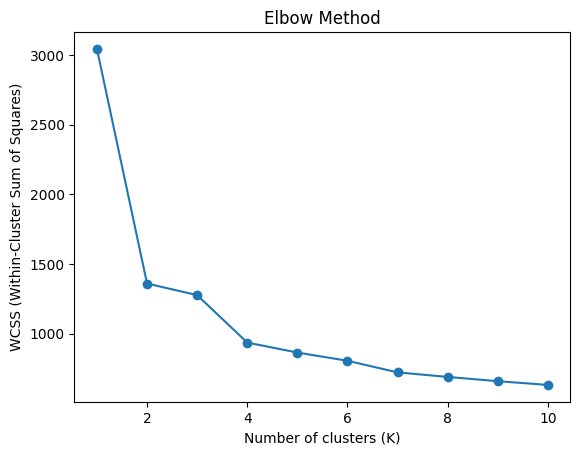

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ลองตั้งค่า K ตั้งแต่ 1 ถึง 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# วาดกราฟ Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()


In [ ]:
# ใช้ K-Means กับค่า K ที่เลือก (เช่น K = 2)
kmeans = KMeans(n_clusters=2, random_state=42,)
df_non_outlier['Cluster'] = kmeans.fit_predict(X_scaled)


<ipython-input-273-bcb3b0f5ef2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_outlier['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, df_non_outlier["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.48


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, df_non_outlier["Cluster"])
print(f"Davies-Bouldin Index: {db_score:.2f}")


Davies-Bouldin Index: 0.81


In [ ]:
df_non_outlier.groupby("Cluster").mean()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,12004.484305,2.408072,0.937220,3.524664,6.860987
1,33782.383420,5.515544,3.489637,0.981865,2.000000


In [ ]:
cluster_sizes = df_non_outlier["Cluster"].value_counts()
print(cluster_sizes)

Cluster
1    386
0    223
Name: count, dtype: int64


In [ ]:
numeric_cols = df_non_outlier.select_dtypes(include=['number']).columns


cluster_summary = df_non_outlier.groupby("Cluster")[numeric_cols].mean()
print(cluster_summary)

         Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0            12004.484305            2.408072           0.937220   
1            33782.383420            5.515544           3.489637   

         Total_visits_online  Total_calls_made  Cluster  
Cluster                                                  
0                   3.524664          6.860987      0.0  
1                   0.981865          2.000000      1.0  


<ipython-input-271-bbce39f569e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_outlier["Cluster_Label"] = df_non_outlier["Cluster"].replace(label_mapping)


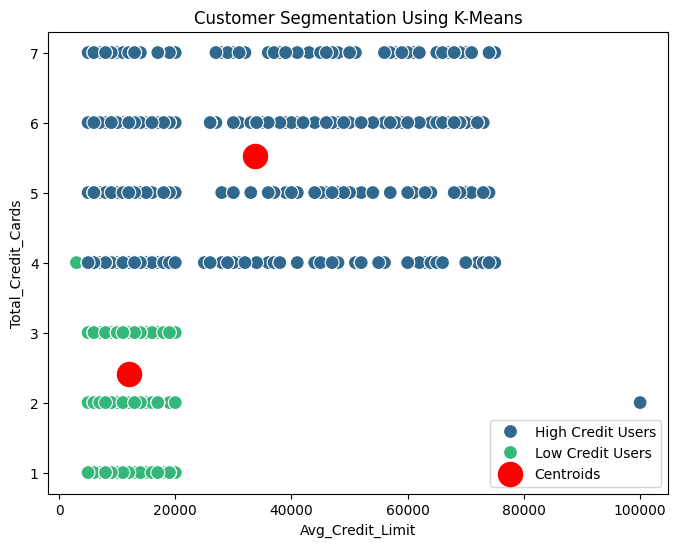

In [ ]:
# กำหนดชื่อแทน Cluster 0 และ 1
label_mapping = {0: "Low Credit Users", 1: "High Credit Users"}

df_non_outlier["Cluster_Label"] = df_non_outlier["Cluster"].replace(label_mapping)

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=df_non_outlier["Avg_Credit_Limit"],
    y=df_non_outlier["Total_Credit_Cards"],
    hue=df_non_outlier["Cluster_Label"],
    palette="viridis",
    s=100
)

plt.scatter(
    kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
    kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
    s=300, c="red", marker="o", label="Centroids"
)

plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.title("Customer Segmentation Using K-Means")
plt.legend()
plt.show()
